# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = '..//Day4//'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ..//Day4//application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

In [8]:
a = app_train.groupby(['CNT_CHILDREN'])
a.describe()

AMT_ANNUITY                                                  \
                   count          mean           std      min        25%   
CNT_CHILDREN                                                               
0               215359.0  26909.255771  14448.287588   1615.5  16456.500   
1                61119.0  27458.945737  14498.095869   2295.0  16623.000   
2                26749.0  27755.527777  14654.923528   2187.0  16875.000   
3                 3717.0  28095.100484  15211.684670   2979.0  17356.500   
4                  429.0  28474.101399  17616.057451   3847.5  17707.500   
5                   84.0  27647.464286  14259.579531   5089.5  16466.625   
6                   21.0  24871.928571  10022.318221   6349.5  18238.500   
7                    7.0  23312.571429  11024.654951  10876.5  16488.000   
8                    2.0  26833.500000   4403.861033  23719.5  25276.500   
9                    2.0  26696.250000   6271.683596  22261.5  24478.875   
10                   2.0   8930.250000   5132.534571   5301.0   7115.625   
11                   1.0  38515.500000           NaN  38515.5  38515.500   
12                   2.0  34609.500000  34626.311968  10125.0  22367.250   
14                   3.0  34980.000000  17819.112099  23814.0  24705.000   
19                   2.0  11340.000000   3608.365904   8788.5  10064.250   

                                            AMT_CREDIT                 ...    \
                   50%        75%       max      count          mean   ...     
CNT_CHILDREN                                                           ...     
0             24579.00  34303.500  230161.5   215371.0  5.991030e+05   ...     
1             25537.50  35392.500  225000.0    61119.0  5.956403e+05   ...     
2             25965.00  35523.000  258025.5    26749.0  6.048271e+05   ...     
3             26217.00  35815.500  225000.0     3717.0  6.078956e+05   ...     
4             25537.50  35617.500  225000.0      429.0  6.182227e+05   ...     
5             24590.25  35781.750   67500.0       84.0  5.714609e+05   ...     
6             26316.00  30528.000   51021.0       21.0  5.237361e+05   ...     
7             20893.50  28374.750   41692.5        7.0  4.579444e+05   ...     
8             26833.50  28390.500   29947.5        2.0  4.975200e+05   ...     
9             26696.25  28913.625   31131.0        2.0  5.832855e+05   ...     
10             8930.25  10744.875   12559.5        2.0  1.049085e+05   ...     
11            38515.50  38515.500   38515.5        1.0  1.007762e+06   ...     
12            34609.50  46851.750   59094.0        2.0  4.743900e+05   ...     
14            25596.00  40563.000   55530.0        3.0  8.330700e+05   ...     
19            11340.00  12615.750   13891.5        2.0  2.022750e+05   ...     

             YEARS_BUILD_MEDI         YEARS_BUILD_MODE                      \
                          75%     max            count      mean       std   
CNT_CHILDREN                                                                 
0                    0.825600  1.0000          72857.0  0.757767  0.109788   
1                    0.825600  1.0000          21297.0  0.762415  0.108789   
2                    0.832300  1.0000           7943.0  0.767922  0.114126   
3                    0.839000  1.0000            833.0  0.771062  0.125821   
4                    0.839000  0.9799             74.0  0.773705  0.112298   
5                    0.839000  0.9262              8.0  0.796650  0.090164   
6                    0.929600  0.9665              3.0  0.834467  0.171689   
7                    0.838950  0.9597              3.0  0.804000  0.135793   
8                         NaN     NaN              0.0       NaN       NaN   
9                    0.966500  0.9665              1.0  0.967300       NaN   
10                        NaN     NaN              0.0       NaN       NaN   
11                        NaN     NaN              0.0       NaN       NaN   
12                   0.636025  0.

In [14]:
#1
cut_rule = pd.IntervalIndex.from_tuples([(-1,0),(0,2),(2,5),(5,19)])

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-1, 0]    215371
(0, 2]      87868
(2, 5]       4230
(5, 19]        42
Name: CNT_CHILDREN_GROUP, dtype: int64

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot

In [15]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP','TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
(-1, 0]             0         166747.010980
                    1         160804.210548
(0, 2]              0         174590.584401
                    1         176115.362720
(2, 5]              0         175053.742913
                    1         160677.385714
(5, 19]             0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

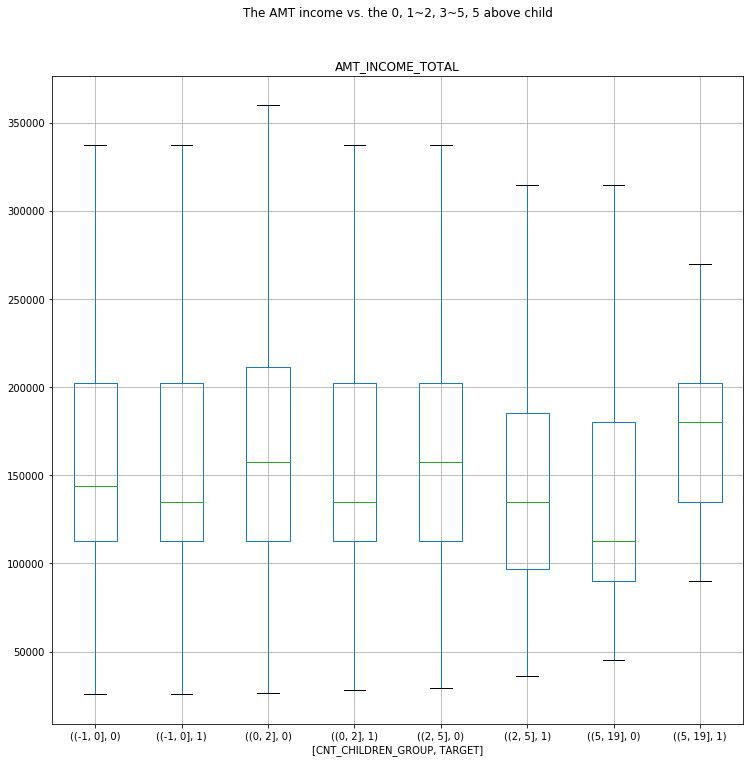

In [21]:
#2-2
"""
Your code here
"""
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP','TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('The AMT income vs. the 0, 1~2, 3~5, 5 above child')
plt.show()

3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [22]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x - x.mean())/x.std())

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,270000.0,0.972434
2,67500.0,-0.934706
3,135000.0,-0.298993
4,121500.0,-0.426135
